In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### 1. Analyze by describing data

In [2]:
train_df = pd.read_csv('C:\\Users\\doris\\Documents\\Julian\\Analytics_and_Data_Science\\Python\\titanic\\data\\train.csv').rename(columns=str.lower)

In [3]:
print(train_df.shape)
print(train_df.columns.values)
train_df.isnull().sum()  #177 null in age, 687 null in cabin, 2 null in embarked

(891, 12)
['passengerid' 'survived' 'pclass' 'name' 'sex' 'age' 'sibsp' 'parch'
 'ticket' 'fare' 'cabin' 'embarked']


passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

"""

Target: 
      survival 0=No / 1=Yes 
Features:
      passengerid
      pclass Ticket Class 1 = 1st, 2 = 2nd, 3 = 3rd
      name
      sex
      age
      sibsp  # of siblings / spouses aboard the Titanic
      parch  # of parents / children aboard the Titanic
      ticket Ticket number
      fare   Passenger fare
      cabin  Cabin Number
      embarked  Port of Embarkation  C = Cherbourg, Q = Queenstown, S = Southampton

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

"""

In [4]:
char_cols = list(train_df.dtypes[train_df.dtypes == 'object'].index)
print(char_cols)
num_cols = list(train_df.dtypes[train_df.dtypes != 'object'].index)
print(num_cols)

['name', 'sex', 'ticket', 'cabin', 'embarked']
['passengerid', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


In [5]:
train_df.head(50)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


"""
For Character Variables
Categorical: Name, Sex, and Embarked. 

For  NumeriVariables
Continous: Age, Fare. 
Discrete: Survived, SibSp, Parch.
Ordinal: Pclass.

Ticket is a mix of numeric and alphanumeric data types. 
Cabin is alphanumeric.

"""

In [6]:
train_df[num_cols].describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
np.percentile(train_df['survived'], [10, 20, 30, 40, 50, 60, 70, 80, 90, 99])

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1.])

In [8]:
np.percentile(train_df['sibsp'], [10, 20, 30, 40, 50, 60, 70, 80, 90, 99])

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 5.])

In [9]:
np.percentile(train_df['parch'], [10, 20, 30, 40, 50, 60, 70, 80, 90, 99])

array([0., 0., 0., 0., 0., 0., 0., 1., 2., 4.])

In [10]:
np.nanpercentile(train_df['fare'], [10, 20, 30, 40, 50, 60, 70, 80, 90, 99])

array([  7.55   ,   7.8542 ,   8.05   ,  10.5    ,  14.4542 ,  21.6792 ,
        27.     ,  39.6875 ,  77.9583 , 249.00622])

In [11]:
np.nanpercentile(train_df['age'], [10, 20, 30, 40, 50, 60, 70, 80, 90, 99])

array([14.  , 19.  , 22.  , 25.  , 28.  , 31.8 , 36.  , 41.  , 50.  ,
       65.87])

"""
survival rate in the train dataset is 38%
around 30% had siblings and/or spouse aboard.
more than 80% did not travel with parents or children.
Fares varied significantly with few passengers (<1%) paying as high as $512.
Few elderly passengers (<1%) within age range 65-80.

"""

In [12]:
train_df[char_cols].describe()

,name,sex,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mangan, Miss. Mary",male,347082,B96 B98,S
freq,1,577,7,4,644


"""
Names are unique across the dataset (count=unique=891)
Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
Embarked takes three possible values. S Southampton port used by most passengers (top=S)
Ticket feature has high ratio (22%) of duplicate values (unique=681).

"""

### 2. Analyze by pivoting features (Correlating, Completing, Correcting, Creating, Classifying)

In [13]:
train_df.isnull().sum() 

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [14]:
for col in train_df.columns:
      if col in ['sex', 'embarked', 'pclass', 'sibsp','parch']:
            print(col)
            print(pd.crosstab(train_df[col], train_df.survived, normalize = 'index'))
            print('==============='*5)

pclass
survived         0         1
pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363
sex
survived         0         1
sex                         
female    0.257962  0.742038
male      0.811092  0.188908
sibsp
survived         0         1
sibsp                       
0         0.654605  0.345395
1         0.464115  0.535885
2         0.535714  0.464286
3         0.750000  0.250000
4         0.833333  0.166667
5         1.000000  0.000000
8         1.000000  0.000000
parch
survived         0         1
parch                       
0         0.656342  0.343658
1         0.449153  0.550847
2         0.500000  0.500000
3         0.400000  0.600000
4         1.000000  0.000000
5         0.800000  0.200000
6         1.000000  0.000000
embarked
survived         0         1
embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.663043  0.336957



"""
Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived. We decide to include this feature in our model.
Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74%.
SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features.
"""

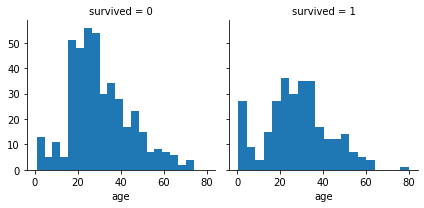

In [15]:
%matplotlib inline

for col in train_df.columns: 
      if col == 'age':
            g = sns.FacetGrid(train_df, col='survived')
            g.map(plt.hist, col, bins=20)

      
"""
Infants (Age <=4) had high survival rate.
Oldest passengers (Age = 80) survived.
Large number of 15-25 year olds did not survive.
Most passengers are in 15-35 age range.

We should consider Age (our assumption classifying #2) in our model training.
Complete the Age feature for null values (completing #1).
We should band age groups (creating #3).
"""


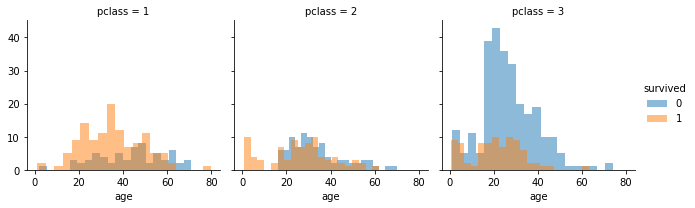

In [16]:
grid = sns.FacetGrid(train_df, col='pclass', hue='survived')
#grid = sns.FacetGrid(train_df, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

"""
Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
Pclass varies in terms of Age distribution of passengers.

Consider Pclass for model training.
"""

C:\Users\doris\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\doris\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


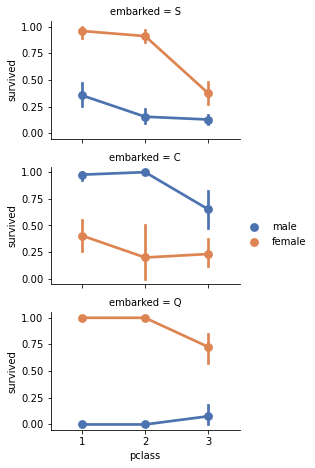

In [17]:
grid = sns.FacetGrid(train_df, row='embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='deep')
grid.add_legend()
plt.show()

In [18]:
print(pd.crosstab(train_df['embarked'], train_df.pclass, normalize = 'index'))
print(pd.crosstab(train_df['pclass'], train_df.sex, normalize = 'index'))

pclass           1         2         3
embarked                              
C         0.505952  0.101190  0.392857
Q         0.025974  0.038961  0.935065
S         0.197205  0.254658  0.548137
sex       female      male
pclass                    
1       0.435185  0.564815
2       0.413043  0.586957
3       0.293279  0.706721



"""
Female passengers had much better survival rate than males. Confirms classifying (#1).
Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

Add Sex feature to model training.
Complete and add Embarked feature to model training.

"""

C:\Users\doris\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\doris\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


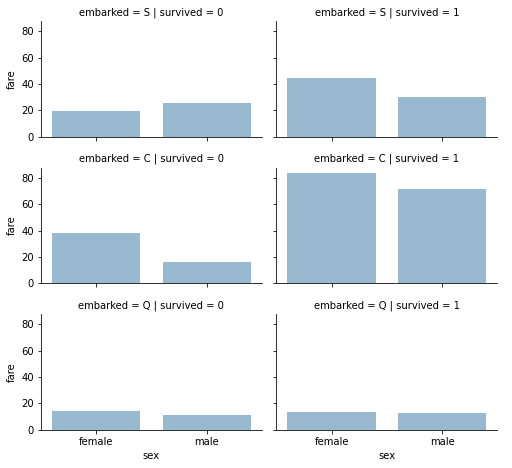

In [19]:
grid = sns.FacetGrid(train_df, row='embarked', col='survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'sex', 'fare', alpha=.5, ci=None)
grid.add_legend()

"""
Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

Consider banding Fare feature.
"""

### 3. Feature Engineering

In [20]:
print(train_df.columns.values)

['passengerid' 'survived' 'pclass' 'name' 'sex' 'age' 'sibsp' 'parch'
 'ticket' 'fare' 'cabin' 'embarked']


C:\Users\doris\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


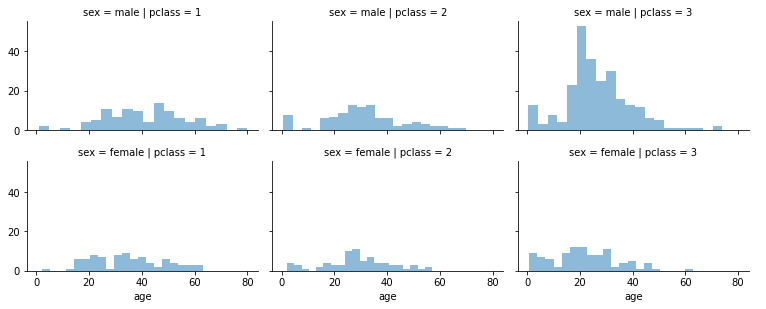

In [21]:
grid = sns.FacetGrid(train_df, col='pclass', row='sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()
plt.show()


1) Dropping cabin ticket

2) Creating title feature from name and passengerid and then drop them

3) Convert Sex to (0,1)

4) Impute missing value for age using gender and pclass: take median of each group

5) Impute Embark with mode and convert to (0,1,2)

6) AgeBand FamilySize IsAlone FareBand
